In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

# 변수 설정
t = 10  # 시간 단계 수
sample = 10000  # 샘플 수

# 초기 상태 분포 (3번 상태에서 시작)
pi = np.array([0, 0, 1])

# 상태 전이 확률 행렬 P
P = np.array([[0.7, 0.2, 0.1],
              [0.3, 0.65, 0.05],
              [0.15, 0.35, 0.5]])

# 각 시간 단계에서의 상태 분포를 저장할 리스트
pi_list = []

# 시간 단계별로 상태 분포를 계산
for _ in range(t):
    pi = np.dot(pi, P)  # 현재 상태 분포와 전이 확률 행렬을 곱하여 다음 상태 분포 계산
    pi_list.append(pi)  # 계산된 상태 분포를 리스트에 추가

# 각 시간 단계에서 상태의 빈도를 저장할 리스트 초기화
Xts_counts = [[] for _ in range(t)]

# 샘플 수만큼 반복하여 시뮬레이션
for _ in range(sample):
    X0 = 3  # 초기 상태 설정 (3번 상태에서 시작)
    Xt = X0  # 현재 상태를 초기 상태로 설정
    for i in range(t):
        # 다음 상태를 현재 상태의 전이 확률에 따라 결정
        next_state = np.random.choice([1, 2, 3], p=P[Xt-1])
        Xt = next_state  # 현재 상태를 다음 상태로 업데이트
        Xts_counts[i].append(next_state)  # 해당 시간 단계에 다음 상태를 추가

# 각 시간 단계별로 상태 빈도 출력
for j in range(t):
    print(Xts_counts[j].count(1), Xts_counts[j].count(2), Xts_counts[j].count(3))

1542 3502 4956
2864 4308 2828
3652 4433 1915
4198 4229 1573
4410 4157 1433
4515 4046 1439
4560 4057 1383
4615 4018 1367
4726 3910 1364
4686 3986 1328


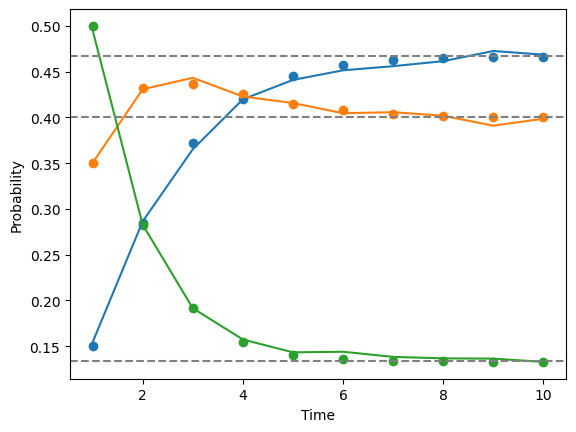

In [ ]:
# 리스트를 배열로 변환
pi_list = np.array(pi_list)
x_values = range(1, t+1)  # x 축 값 설정

# 각 상태에 대해 시간 단계별 비율을 계산하고 그래프에 그리기
for state in range(1, 4):
    counts = [Xts_counts[i].count(state)/sample for i in range(t)]  # 각 상태의 비율 계산
    plt.plot(x_values, counts)  # 상태 비율을 선 그래프로 그림

# 계산된 상태 분포를 산점도로 그래프에 그리기
for i in range(3):
    plt.scatter(x_values, pi_list[:, i])

# 전이 확률 행렬의 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(P.transpose())
V1 = eigenvectors.transpose()[0]
normalized_V1 = V1/np.sum(V1)  # 첫 번째 고유벡터를 정규화

# 정규화된 고유벡터를 사용하여 수평선 그리기
for i in normalized_V1:
    plt.axhline(i, color='gray', linestyle='--')

# 그래프 레이블 설정 및 표시
plt.xlabel('Time')
plt.ylabel('Probability')
plt.show()